<a href="https://www.kaggle.com/code/mvincentdepaul2023/notebooke160d5f257?scriptVersionId=181002131" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Descision Tree Classifier Wiht Supervised Learning

### What is Supervised Learning:

### What is Decision Tree Classifier:
A decision tree is a supervised machine learning algorithm that is a flowchart-like tree structure where it predicts the value of a target variable by learning simple decision rules inferred from the data features(or attributes). The internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.

The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value.
Read more:

1.https://scikit-learn.org/stable/modules/tree.html

2.https://www.datacamp.com/tutorial/decision-tree-classification-python

### Importing Needed Libraries
Here every library I will try to mention why I imported it and what am I going to use from it.
I always like to start by placing my libraries on top so I can easily navigate back to them (others can use their own favorite approaches)

##### 1.pandas:
pandas is a highly used Python library in data science, and it is due to its high ability to handle big data and analyze it. It also It has functions for cleaning, exploring, and manipulating data. Read more:
https://www.w3schools.com/python/pandas/default.asp

##### 2.seaborn:
Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Read more:
 https://seaborn.pydata.org/tutorial/introduction.html

##### 3.sklearn:
Scikit-learn is an open source data analysis library, and the gold standard for Machine Learning (ML) in the Python ecosystem. Key concepts and features include:

Algorithmic decision-making methods, including: *Classification: identifying and categorizing data based on patterns. *Regression: predicting or projecting data values based on the average mean of existing and planned data. *Clustering: automatic grouping of similar data into datasets.
Algorithms that support predictive analysis ranging from simple linear regression to neural network pattern recognition.
Interoperability with NumPy, pandas, and matplotlib libraries.
Read more:

1.https://scikit-learn.org/stable/

2.https://www.activestate.com/resources/quick-reads/what-is-scikit-learn-in-python/


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import PIL
import cv2
import os
import pathlib



# Remove folders if needed

In [ ]:
def delete_folder(folder_name):
  directory_to_delete="/content/data_256_" + folder_name
  try:
    shutil.rmtree(directory_to_delete)

  except Exception as e:
    print(e)

### Upload the dataset into the notebook
The following steps will be to upload the data here and then unzip the file that contains them.

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
!unzip data_256.zip

Archive:  data_256.zip

replace data_256/art_gallery/00000001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y

  inflating: data_256/art_gallery/00000001.jpg  

replace data_256/art_gallery/00000002.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y

  inflating: data_256/art_gallery/00000002.jpg  

replace data_256/art_gallery/00000003.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Check the count for the uploaded data

In [9]:
try:
    data_dir = pathlib.Path('/kaggle/input/dataset-256/data_256')
except(e):
    print(e)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

5000


### Display an image from the data

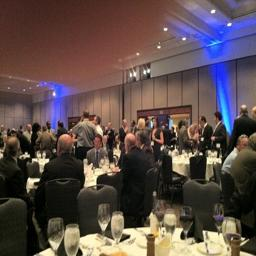

In [11]:
pics= list(data_dir.glob('banquet_hall/*'))
PIL.Image.open(str(pics[0]))

## Preproccessing
Our first step is to reduce the dimensionality of our dataset images because of the limited resources we have.

### Resize

In [ ]:
def preproccessing_resize():

  # Base directory containing the folders of images
  base_input_directory = '/content/data_256'
  base_output_directory = '/content/data_256_resize'

  # Ensure the base output directory exists
  if not os.path.exists(base_output_directory):
      os.makedirs(base_output_directory)

  # Loop through each subfolder in the base input directory
  for folder in os.listdir(base_input_directory):
      input_folder = os.path.join(base_input_directory, folder)
      output_folder = os.path.join(base_output_directory, folder)

      # Create an output subfolder if it doesn't exist
      if not os.path.exists(output_folder):
          os.makedirs(output_folder)

      # Process each image in the folder
      for filename in os.listdir(input_folder):
          if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
              # Read the image
              img = cv2.imread(os.path.join(input_folder, filename))

              # Resize the image
              resized = cv2.resize(img, (256, 256))

              # Save the resized image to the corresponding output subfolder
              cv2.imwrite(os.path.join(output_folder, filename), resized)

  print('All image processing complete.')


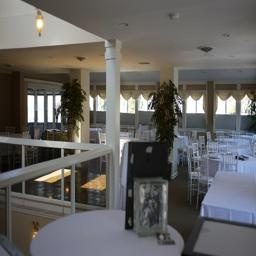

In [ ]:
data_dir = pathlib.Path('/content/data_256_resize')
pics= list(data_dir.glob('banquet_hall/*'))
PIL.Image.open(str(pics[0]))

### Grayscale

In [5]:
# Base directory containing the folders of images
# base_input_directory = '/content/data_256' # if you want to first resize the images, imput '/content/data_256_resize'
base_input_directory = '/kaggle/input/dataset-256/data_256' 
# base_output_directory = '/content/data_256_grayscale'
base_output_directory = '/kaggle/working/data_256_grayscale'

# Ensure the base output directory exists
if not os.path.exists(base_output_directory):
    os.makedirs(base_output_directory)

# Loop through each subfolder in the base input directory
for folder in os.listdir(base_input_directory):
    input_folder = os.path.join(base_input_directory, folder)
    output_folder = os.path.join(base_output_directory, folder)

    # Create an output subfolder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Process each image in the folder
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
            # Read the image
            img = cv2.imread(os.path.join(input_folder, filename))


            # Grayscale the image
            grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Save the resized image to the corresponding output subfolder
            cv2.imwrite(os.path.join(output_folder, filename), grayscaled)

print('All image processing complete.')




All image processing complete.


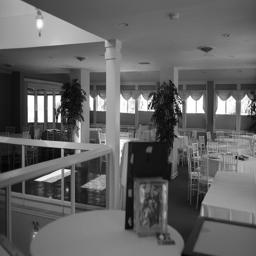

In [ ]:
# data_dir = pathlib.Path('/content/data_256_grayscale')
data_dir = pathlib.Path('/content/data_256_grayscale')
pics= list(data_dir.glob('banquet_hall/*'))
PIL.Image.open(str(pics[0]))

### Flatten

In [6]:
def load_images_and_labels(base_directory):
    images = []
    labels = []
    label_names = os.listdir(base_directory)

    # Loop over each label
    for label in label_names:
        folder_path = os.path.join(base_directory, label)
        if os.path.isdir(folder_path):
            # Loop over each image file
            for filename in os.listdir(folder_path):
                file_path = os.path.join(folder_path, filename)
                if filename.lower().endswith('.jpg'):
                    # Read the image
                    img = cv2.imread(file_path)
                    # print(label)
                    # break

   # Flatten the image and append to the list
                    images.append(img.flatten())
                    labels.append(label)

    return np.array(images), np.array(labels), label_names
# Path to your dataset1
# dataset_path = '/content/data_256_grayscale'
dataset_path = '/kaggle/working/data_256_grayscale'
images, labels, label_names = load_images_and_labels(dataset_path)

Normalisation

In [11]:
X=images/255.0
print(X)

[[0.50196078 0.50196078 0.50196078 ... 0.12941176 0.12941176 0.12941176]
 [0.82745098 0.82745098 0.82745098 ... 0.15686275 0.15686275 0.15686275]
 [0.29803922 0.29803922 0.29803922 ... 0.31764706 0.31764706 0.31764706]
 ...
 [0.25882353 0.25882353 0.25882353 ... 0.28627451 0.28627451 0.28627451]
 [0.30196078 0.30196078 0.30196078 ... 0.18823529 0.18823529 0.18823529]
 [0.11764706 0.11764706 0.11764706 ... 1.         1.         1.        ]]


### Split dataset

In [8]:
print(labels)

['library indoor' 'library indoor' 'library indoor' ... 'art_gallery'
 'art_gallery' 'art_gallery']


In [9]:
# print(len(X))
print(len(labels))

5000
5000


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=0)